
## ECOPs AFRICA OCEAN COLOUR TRAINING

### M2-L2: Data manipulation and analysis
<span style="color:brown; font-size:1.2em;font-style:italic">Part2: 2. Time-series analysis: Annual Min/Max</span>
<hr style="border:2px solid rgb(30,70,125)"> </hr>


<span style="font-size:1.1em;">Eligio Maure (maure@npec.or.jp)</span>

***
**Note 1**: Execute each cell through the <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play"></i></button> button from the top MENU (or keyboard shortcut `Shift` + `Enter`).<br>
<br>
**Note 2**: If, for any reason, the kernel is not working anymore, in the top MENU, click on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> button.   
Then, in the top MENU, click on "Cell" and select "Run All Above Selected Cell".<br>
***

# Table of contents
- [1. Purpose](#1.-Purpose)
- [2. Library import](#2.-Library-import)
- [3. Annual Max](#3.-Annual-Max)
- [4. Annual Min](#4.-Annual-Min)
- [5. Resources](#5.-Resources)
***

# 1. Purpose
[Return to the "Table of contents"](#Table-of-contents)

In this exercise you will learn to
- extract annual min/max of a given parameter and the time when it occurs.
- interprete the obtained results for chlorophyll and sea surface temperature.

The images we will be are using the NASA's [Level-3 Browser](https://oceancolor.gsfc.nasa.gov/l3/).

***

# 2. Library import   
[Return to the "Table of contents"](#Table-of-contents)

Start by importing require modules for this activity   
If a module throws a `ModuleNotFoundError` try installing it with the command  
- `!conda install --channel "conda-forge" module` or with  
- `!pip install module`  

If you have a requirement file containing the names of the modules you want to install, use
- `!pip install -r requirements.txt`

Remove `!` if you run the command directly in your terminal or command prompt.   
For this exercise we created a Python environment using the `environment.yml` file which contains the required module.   
You can also add additional modules to the list.

---

In [1]:
# Data manipulation
import numpy as np

# System
import sys
from pathlib import Path

# Visualization
from matplotlib import ticker, colors, pyplot as plt
from matplotlib.dates import DateFormatter
from cartopy import crs as ccrs, feature as cfeature

%matplotlib inline

Matplotlib comes with defaults parameters used for plotting and visualization.   
For example, during instantiation of figures in Matplotlib, often we pass `figsize` parameter to `plt.figure`. <br>
Matplotlib can also be customized to override the default values using rc (runtime configuration) settings.
***

In [2]:
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = (20, 8)
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.linestyle'] = ':'
plt.rcParams['savefig.facecolor'] = '0.8'
# plt.rcParams['figure.constrained_layout.use'] = True

- **Local modules**  

Include a local library (scripts) with custom fuctions.  

We use the `sys` module to append a directory to the list of known paths for interpreter to search.  
This allow us to import the custom functions or modules not in the search directories.

We also use the `Path` library to help us get the name of the current working directory.

---

In [3]:
# appending a path
cwd = Path.cwd()
sys.path.append(str(cwd.parent))

import octutils as util

# 3. Annual Max
[Return to the "Table of contents"](#Table-of-contents)
- Get annual max and display the time of max

In [4]:
help(util.annual_max)

Help on function annual_max in module octutils.pyutils:

annual_max(files, var)
    Return the maximum and the time when it occurs from the input files.
    :param files: input list of files from which the maximum is obtained.
    :type files: list
    :param var: variable name in the list of files.
    :type var: str
    :return: tuple of lon, lat, data, and time of max
    :rtype: tuple



In [5]:
%%time
input_dir = cwd.joinpath('data')
varname = 'chlor_a'    # extract variable name 
chlf = list(input_dir.glob(f'A*{varname}.nc'))

lon, lat, amax, dmax = util.annual_max(files=chlf, var=varname)

Wall time: 216 ms


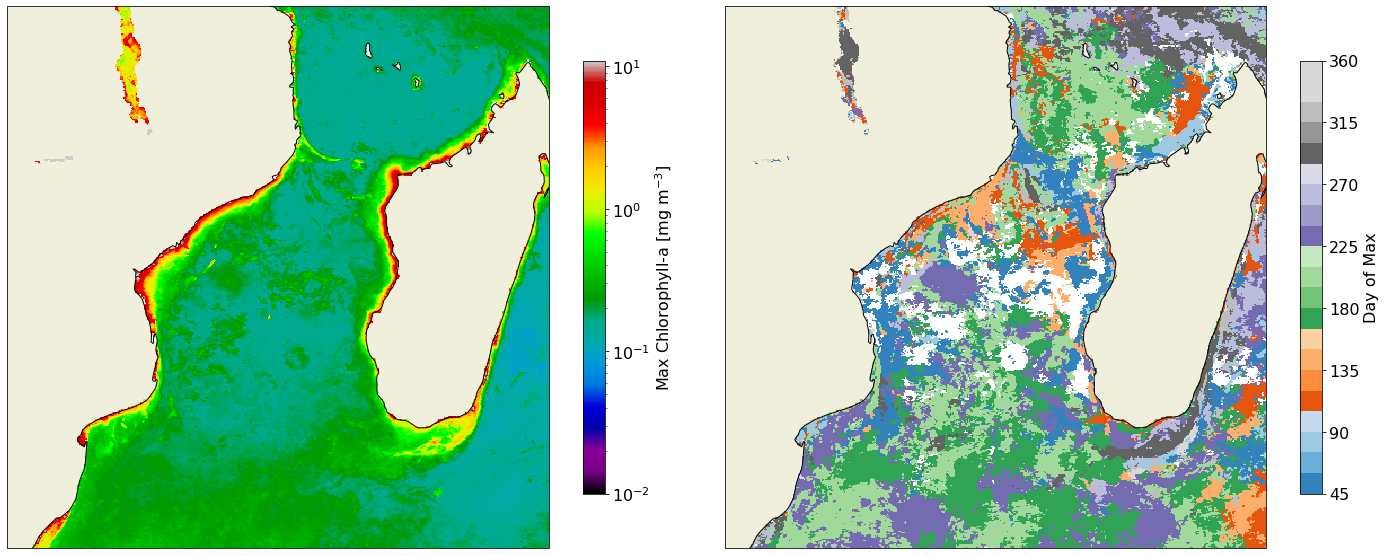

In [6]:
crs = ccrs.PlateCarree() # map projection
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20,8), 
                               subplot_kw={'projection':crs})

# LogNorm for chlorophyll data
m = ax0.pcolormesh(lon, lat, amax, cmap='nipy_spectral', 
                   norm=colors.LogNorm(vmin=0.01, vmax=11), shading='auto')
cb = fig.colorbar(m, ax=ax0, orientation='vertical', shrink=0.8)
cb.set_label('Max Chlorophyll-a [mg m$^{-3}$]')
ax0.coastlines()
ax0.add_feature(cfeature.LAND)

# linear scale for day of max data
levels = ticker.MaxNLocator(nbins=25).tick_values(dmax.min(), dmax.max())
norm = colors.BoundaryNorm(boundaries=levels, ncolors=levels.size, clip=True)
m = ax1.pcolormesh(lon, lat, dmax, cmap='tab20c', shading='auto', norm=norm)
cb = fig.colorbar(m, ax=ax1, orientation='vertical', shrink=0.8)
cb.set_label('Day of Max')
ax1.coastlines()
ax1.add_feature(cfeature.LAND)


fig.tight_layout()

# 4. Annual Min
[Return to the "Table of contents"](#Table-of-contents)
- The same can be done for the annual min.

In [7]:
help(util.annual_min)

Help on function annual_min in module octutils.pyutils:

annual_min(files, var)
    Return the minimum and the time when it occurs from the input files.
    :param files: input list of files from which the minimum is obtained.
    :type files: list
    :param var: variable name in the list of files.
    :type var: str
    :return: tuple of lon, lat, data, and time of min
    :rtype: tuple



In [10]:
%%time
input_dir = cwd.joinpath('data')
varname = 'chlor_a'    # extract variable name 
chlf = list(input_dir.glob(f'A*{varname}.nc'))

lon, lat, amin, dmin = util.annual_min(files=chlf, var=varname)

Wall time: 155 ms


(46, 350)

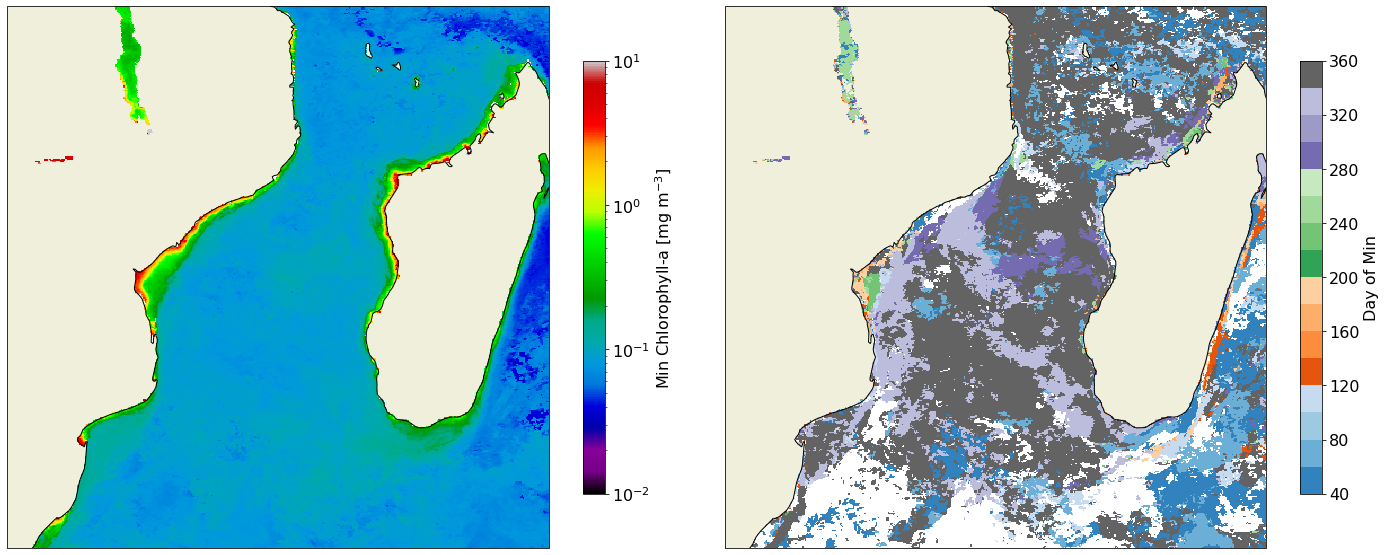

In [29]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20,8), 
                               subplot_kw={'projection':crs})

# LogNorm for chlorophyll data
m = ax0.pcolormesh(lon, lat, amin, cmap='nipy_spectral', 
                   norm=colors.LogNorm(vmin=0.01, vmax=10), shading='auto')
cb = fig.colorbar(m, ax=ax0, orientation='vertical', shrink=0.8)
cb.set_label('Min Chlorophyll-a [mg m$^{-3}$]')
ax0.coastlines()
ax0.add_feature(cfeature.LAND)

# linear scale for day of max data
levels = ticker.MaxNLocator(nbins=20).tick_values(dmin.min(), dmin.max())
norm = colors.BoundaryNorm(boundaries=levels, ncolors=levels.size, clip=True)
m = ax1.pcolormesh(lon, lat, dmin, cmap='tab20c', shading='auto', norm=norm)
cb = fig.colorbar(m, ax=ax1, orientation='vertical', shrink=0.8)
cb.set_label('Day of Min')
ax1.coastlines()
ax1.add_feature(cfeature.LAND)


fig.tight_layout()

<div class="alert alert-block alert-warning" /div>
    <h3>Task</h3>
    
--- 
    
Repeat the same exercise but now for sea surface temperature.    
Compare the results with those obtained for chlorophyll.   
Compare the map results with the timeseries from `M2L2-time-series-analysis_point-region-extract`

<div class="alert alert-block alert-success"/div>
    <h2>Done!</h2>
  
--- 

#### And thank you for your attention! :) 
    We hope you are enjoying the training provided by A-ECOP for A-ECOPs.

# 5. Resources
[Go back to the "Table of contents"](#Table-of-contents)
1. [NumPy](https://numpy.org/)
4. [Matplotlib](https://matplotlib.org/)
5. [Cartopy](https://scitools.org.uk/cartopy/docs/latest/#)
7. [ECOPs Ocean Colour Training](https://github.com/Elgyii/ocean-colour-training-ecops-africa)